# Lab 02 - Linear Regression

Full name: Truong Minh Hoang

Student code: 22280034


# Outline
- [ 1 - Objective ](#1)
- [ 2 - Packages ](#2)
- [ 3 - Data Preparation ](#3)
- [ 4 - Data Preprocessing ](#4)
- [ 5 - Feature Engineering ](#5)
- [ 6 - Model Training ](#6)
- [ 7 - Model Evaluation ](#7)
- [ 8 - Hyperparameter Tuning ](#8)
- [ 9 - Conclusion ](#9)

<a name="1"></a>
## Objective 
To understand and implement a linear regression model for real estate valuation using a dataset collected from Sindian District, New Taipei City, Taiwan.

<a name="2"></a>
## Packages
Import all the packages that we will need during this lab.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

<a name="3"></a>
## Data Preparation
### Import dataset
Install the ucimlrepo package to import dataset

In [3]:
!pip3 install -U ucimlrepo 

Import the dataset into code

In [4]:
# Fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# Data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
data = pd.concat([X, y], axis = 1)

### Data Information

In [5]:
# Variable information 
print("Variable information\n", real_estate_valuation.variables)

Variable information
                                      name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               Non

In [6]:
# Display the shape of features (X) and target variable (Y)
print(f"Features's shape: \t{X.shape}")
print(f"Target's shape: \t{y.shape}")

Features's shape: 	(414, 6)
Target's shape: 	(414, 1)


In [7]:
# Display the head of both the features and target variables
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [9]:
# Statistical description of data
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


View the dataset and its features by plotting each feature versus house price.

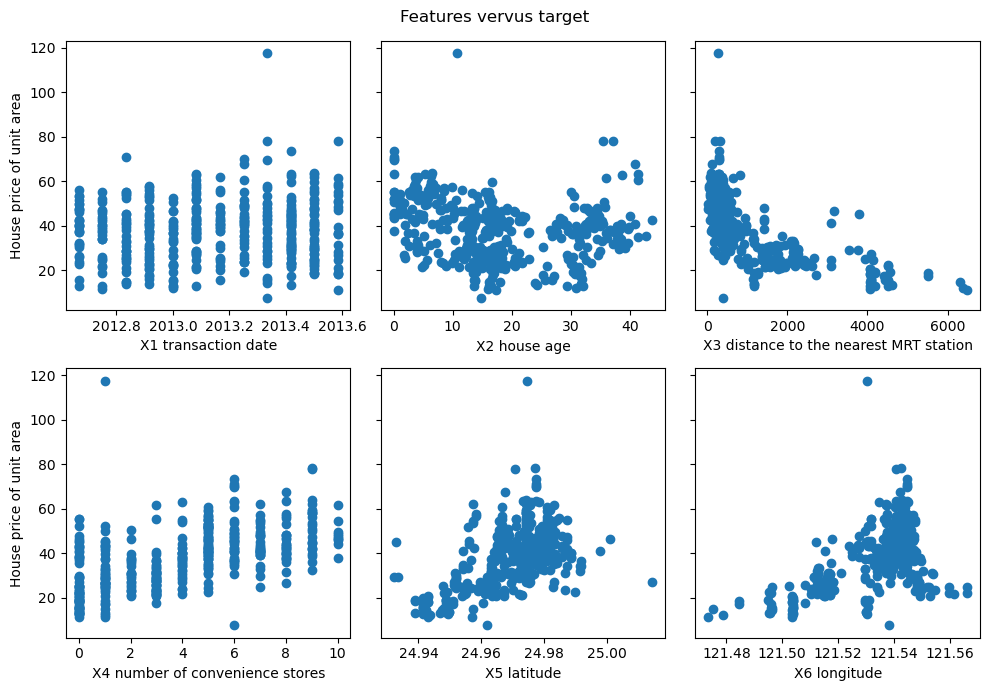

In [10]:
fig,ax=plt.subplots(2, 3, figsize=(10, 7), sharey=True)
k = 0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        ax[i, j].scatter(X.iloc[:, k], y)
        ax[i, j].set_xlabel(X.columns[k])
        k += 1
ax[0, 0].set_ylabel("House price of unit area")
ax[1, 0].set_ylabel("House price of unit area")
fig.suptitle("Features vervus target")
plt.tight_layout()
plt.show()

### Checking for missing values

Actually, the first cell at 'Data Information' has already missing_values count so we don't need to check it again like below. However not all datasets is from 'ucimlrepo' (this library has variable information function which is very convenient) like this dataset so I add this step for the better overview of 'Data Exploration'.

In [11]:
# Check the number of null values in each field
data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Because there is no missing values so we do not need to handle it.

<a name="4"> </a>
## Data Preprocessing

### Feature scaling

We can see each feature do not has the same value range with each others so we need to scale data. In this lab, we will use Standardization, it maintains the shape of the original distribution of the data, making it more suitable for algorithms that assume normally distributed features, such as Linear Regression.

In [12]:
# Fit and transform the features and target variable
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
# Convert the scaled data back to DataFrames
X_scaled = pd.DataFrame(X_scaled)

View the transformation of features before and after scaling.

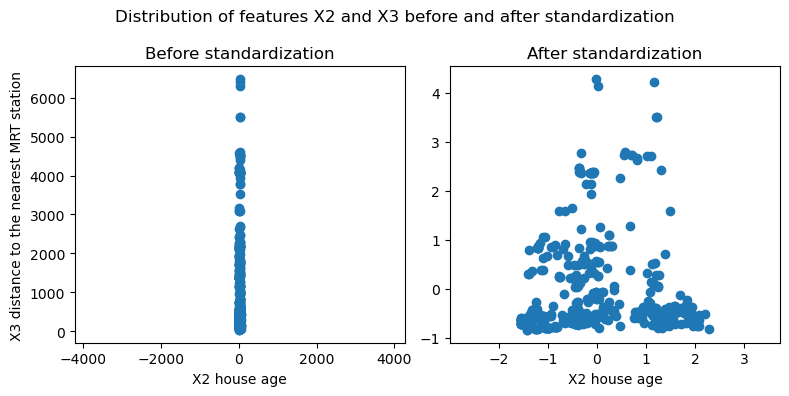

In [14]:
# The numerical order of feature for comparision
f1 = 2
f2 = 3

# Plot the figure
fig,ax=plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X.iloc[:,f1 - 1], X.iloc[:,f2 - 1])
ax[0].set_xlabel(X.columns[f1 - 1]); ax[0].set_ylabel(X.columns[f2 - 1]);
ax[0].set_title("Before standardization")
ax[0].axis('equal')

ax[1].scatter(X_scaled.iloc[:,f1 - 1], X_scaled.iloc[:,f2 - 1])
ax[1].set_xlabel(X.columns[f1 - 1]); ax[0].set_ylabel(X.columns[f2 - 1]);
ax[1].set_title("After standardization")
ax[1].axis('equal')

fig.suptitle(f"Distribution of features X{f1} and X{f2} before and after standardization")
plt.tight_layout()
plt.show()

<a name="5"> </a>
## Feature Engineering
### Analyze the correlation between features and target variable
Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship. 

So that we will use Pearson Correlation to select the relevant features in this lab.

In [15]:
# Calculate correlation coefficients
corr_matrix = data.corr().round(2)
target_corr = corr_matrix['Y house price of unit area']

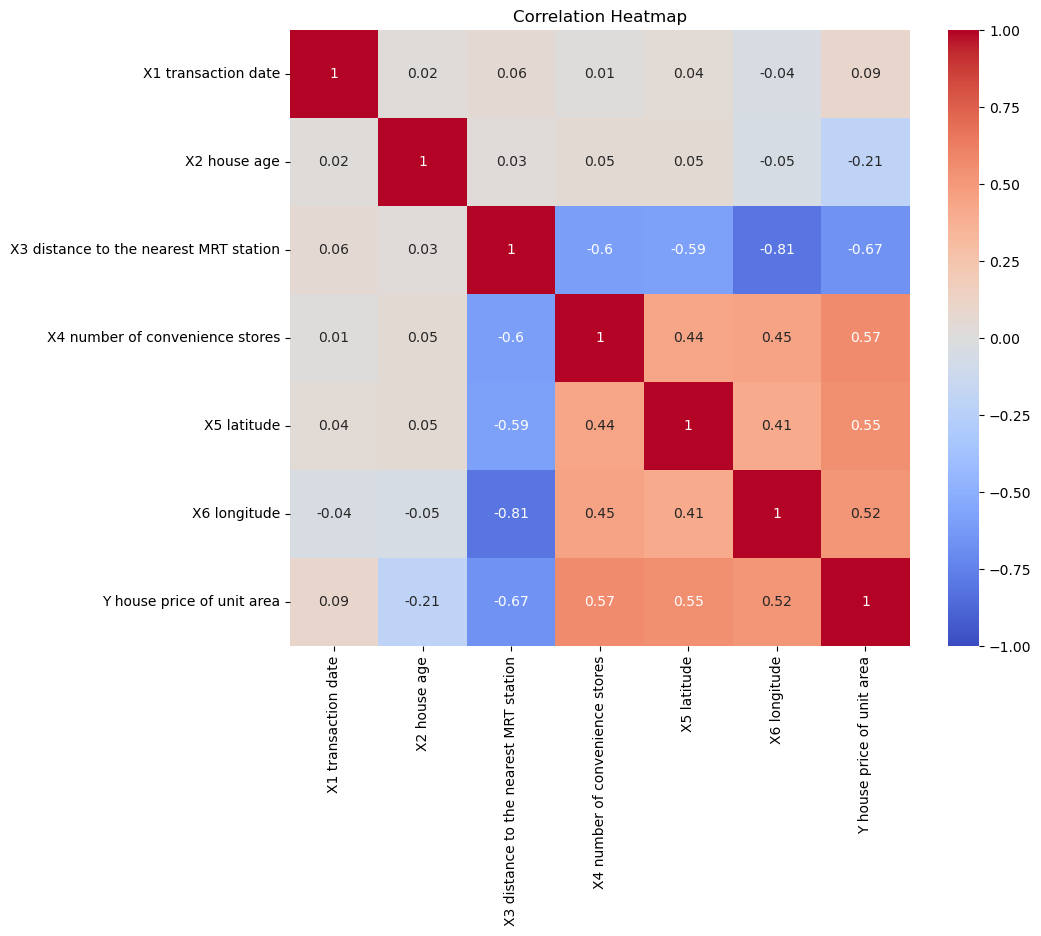

In [16]:
# Visualize correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

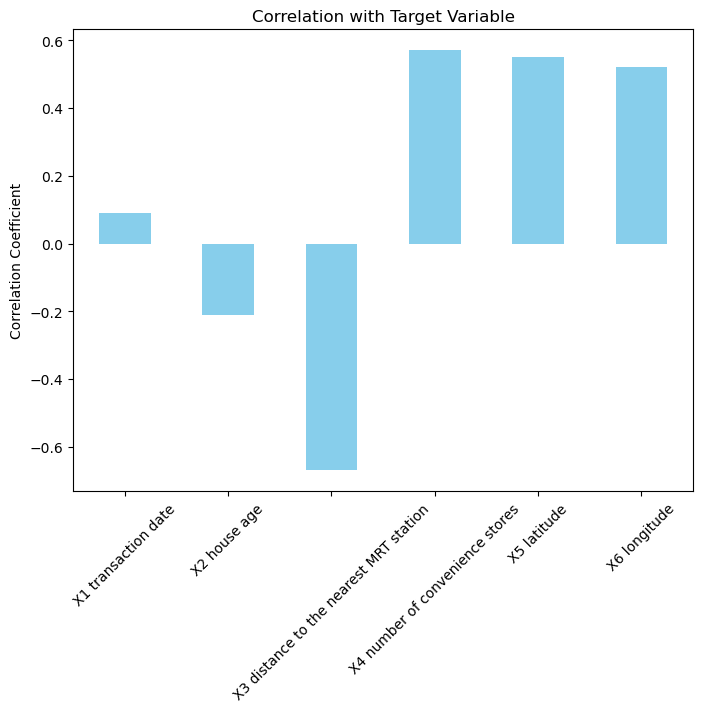

In [17]:
# Visualize correlations between features and target variable with a bar plot
plt.figure(figsize=(8, 6))
target_corr.drop('Y house price of unit area', inplace=True)
target_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

### Select relevant features

In [18]:
target_corr

X1 transaction date                       0.09
X2 house age                             -0.21
X3 distance to the nearest MRT station   -0.67
X4 number of convenience stores           0.57
X5 latitude                               0.55
X6 longitude                              0.52
Name: Y house price of unit area, dtype: float64

In [19]:
# Select relevant features with high correlation coefficients
relevant_features = target_corr[abs(target_corr) >= 0.2].index.tolist()
print("Relevant Features:", relevant_features)

Relevant Features: ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


The feature which have a neligible correlation coefficient is 'X1 transaction date' (according to Pearson Correlation, the absolute range which is less than 0.2 is neligible correlation).

Therefore, I will drop the feature 'X1 transaction date' because it doesn't seem to make much influence on house price prediction and because of its very weak correlation coefficient with target variable.

In [20]:
# Drop the column "X1 transaction date" from scaled features dataframe
X_scaled = X_scaled.drop(X_scaled.columns[0], axis = 1)

Now we will have only 5 features by order
- HouseAge
- DistanceToTheNearestMRTStation
- NumberOfConvenienceStores
- Latitude
- Longtitude

In [21]:
# Rename columns of features and target variable
X_scaled.columns = relevant_features
X_scaled = X_scaled.rename(columns={'X2 house age': 'HouseAge',
                        'X3 distance to the nearest MRT station': 'DistanceToTheNearestMRTStation',
                        'X4 number of convenience stores': 'NumberOfConvenienceStores',
                        'X5 latitude': 'Latitude',
                        'X6 longitude': 'Longtitude'})
y = y.rename(columns={'Y house price of unit area': 'HousePriceOfUnitArea'})

In [22]:
X_scaled.head()

,HouseAge,DistanceToTheNearestMRTStation,NumberOfConvenienceStores,Latitude,Longtitude
0,1.255628,-0.792495,2.007407,1.125430,0.448762
1,0.157086,-0.616612,1.667503,0.912444,0.401139
2,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.117223,-0.549997,0.307885,0.834188,0.592937


<a name="6"> </a>
## Model Training
### Split the dataset into training and testing sets

Because we don't have much data, we will try to give the training set as much data as possible.

In this lab we will split dataset into 90% for training and 10% for testing.

In [23]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=1)

In [24]:
# Display training size and testing size
print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (372, 5) 	y_train: (372, 1)
Testing size: 	X_test: (42, 5) 	y_test: (42, 1)


In [25]:
type(X_train)

pandas.core.frame.DataFrame

### Train the model using training data with Linear Regression model

In [26]:
# Initialize Linear Regression model
regressor = LinearRegression(fit_intercept=True)

# Train the model using the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Model's parameter
print("Coef: \t\t", regressor.coef_)
print("Intercept: \t", regressor.intercept_)

Coef: 		 [[-2.97412182 -5.47686067  3.30103186  3.03002764 -0.224939  ]]
Intercept: 	 [38.13450664]


<a name="7"> </a>
## Model Evaluation
### Evaluate the model
Evaluate the model using appropriate metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.

In [28]:
train_pred = regressor.predict(X_train)
print(">> Train MSE: ", mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", mean_absolute_error(y_train, train_pred))
print(">> Train R-squared: ", r2_score(y_train, train_pred))

print("\n")
test_pred = regressor.predict(X_test)
print(">> Test MSE: ", mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", mean_absolute_error(y_test, test_pred))
print(">> Test R-squared: ", r2_score(y_test, test_pred))

>> Train MSE:  83.99185240324721
>> Train MAE:  6.336248193225538
>> Train R-squared:  0.5476966368903282


>> Test MSE:  37.242883906638404
>> Test MAE:  4.969264107071889
>> Test R-squared:  0.76924367786983


### Visualize the actual vs. predicted house prices

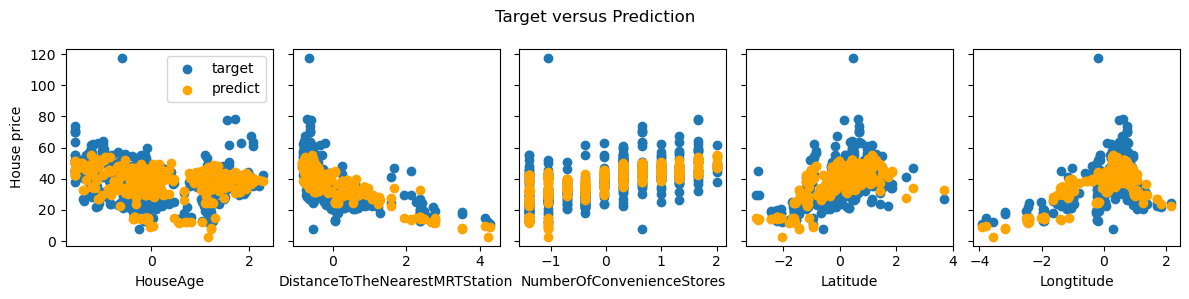

In [29]:
# Plot predictions versus targets by each original feature
fig,ax=plt.subplots(1,5,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train.iloc[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_scaled.columns[i])
    ax[i].scatter(X_train.iloc[:,i],train_pred,color='orange', label = 'predict')
ax[0].set_ylabel("House price"); ax[0].legend();
fig.suptitle("Target versus Prediction")
plt.tight_layout()
plt.show()

<a name="8"> </a>
## Hyperparameter Tuning
### Using Grid Search with Ridge regression

In [30]:
# Initialize Ridge Regression model
ridge = Ridge()

In [31]:
# Define hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.03, 0.06, 0.1, 0.3],  # Regularization strength
    'fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Initialize GridSearchCV with the Ridge Regression model and parameter grid
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5,
                           return_train_score=True)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.03, 0.06, 0.1, 0.3],
                         'fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.3, 'fit_intercept': True}


In [33]:
# Get the best model
best_model = grid_search.best_estimator_

Evaluate the best model on the data

In [34]:
train_pred_ridge = best_model.predict(X_train)
train_pred = regressor.predict(X_train)
print(">> Train MSE: ", mean_squared_error(y_train, train_pred))
print(">> Train MAE: ", mean_absolute_error(y_train, train_pred))
print(">> Train R-squared: ", r2_score(y_train, train_pred))

print("\n")
test_pred_ridge = best_model.predict(X_test)
print(">> Test MSE: ", mean_squared_error(y_test, test_pred))
print(">> Test MAE: ", mean_absolute_error(y_test, test_pred))
print(">> Test R-squared: ", r2_score(y_test, test_pred))

>> Train MSE:  83.99185240324721
>> Train MAE:  6.336248193225538
>> Train R-squared:  0.5476966368903282


>> Test MSE:  37.242883906638404
>> Test MAE:  4.969264107071889
>> Test R-squared:  0.76924367786983


<a name="9"> </a>
## Conlusion

- The model does not fit well because the distance between Train and Test by MSE, MAE, R-squared is not close. This may stem from the fact that we have little data, so that the model have difficulty in fitting the data.
- The scatter plot in the model evaluation show that predict value will gather in the middle when visualize actual versus predict by each features.
- After using Grid Search in Ridge Regression, we get the result that is the same as Linear Regression we has used before.

### Model improvement

We can improve our model by:
- Collecting more data to have enough data for learning model.
- Cultivate more domain knowledge to add reasonable features in Feature Engineering.